# Concatenated simulations

MobsPy allows for combining simulations. In combined simulations, the results from the precedent simulations is fed to the following ones. Thus, allowing the user to make changes to the models for subsequent simulations. 

Here we suply an example where in the first simulation species A grows according to a rate. Afterwards, A stops growing and it must compete with a species B.

Compiling model
Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


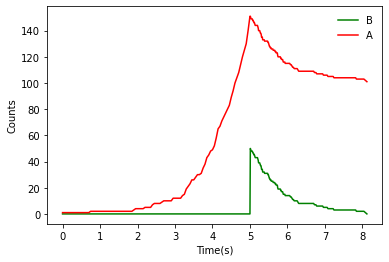

In [1]:
from mobspy import *

A = BaseSpecies()

A >> 2*A [1]

A(1)
S1 = Simulation(A)
S1.duration = 5

A.reset_reactions()
B = BaseSpecies()

A + B >> Zero [0.01]

B(50)
S2 = Simulation (A | B)
S2.duration = (A <= 0) | (B <= 0)

S = S1 + S2
S.method = 'stochastic'
S.run()

An important point to note is that species counts must always be defined before the creation of the simulation object. For the subsequent simulations, if a count was defined before the simulation object creation, it will override the resulting value from the previous sim. 

Compiling model
Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


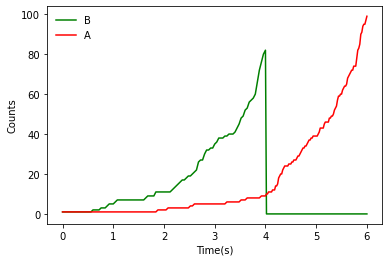

In [2]:
A, B = BaseSpecies()

A >> 2*A [1]
B >> 2*B [1]

A(1), B(1)
S1 = Simulation(A | B)
S1.duration = 4

# This overrides the value of B from S1
B(0)
S2 = Simulation (A | B)
S2.duration = 2

S = S1 + S2
S.method = 'stochastic'
S.run()

For events in concatenated simulations, the event time is based-around each simulation individually and not the global time. Each new simulation starts counting from zero again when considering the event trigger time. 

Compiling model
Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


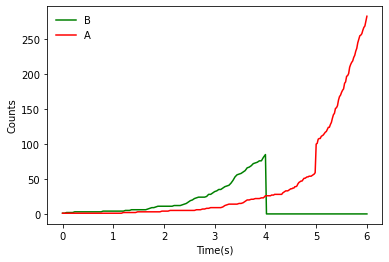

In [3]:
A, B = BaseSpecies()

A >> 2*A [1]
B >> 2*B [1]

A(1), B(1)
S1 = Simulation(A | B)
S1.duration = 4

# This overrides the value of B from S1
B(0)
S2 = Simulation (A | B)
S2.duration = 2

# The event will trigger at time 5 when S2 time is equal to 1
with S2.event_time(1):
    A(0)

# The event will not trigger as the duration of S2 is equal to 2
with S2.event_time(1):
    A(100)

S = S1 + S2
S.method = 'stochastic'
S.run()